In [1]:
# IMPORTING OF LIBRARIES

In [2]:
import codecs
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report

K-Means Clustering Method
It is a method to classify the identical type of data into one group. This algorithm method is important to get a knowledge regarding the data structure and to generate the related analyses. Following are the steps been incorporated while studying IKEA data set:
Task No. 1
We have to determine a new location to open a new IKEA store.
Step 1:
1 would import relevant libraries


In [3]:
# EXPLORING THE IKEA DATA SET

In [4]:
doc = codecs.open('ikea_kommun_data.txt', 'rU', 'ISO-8859-1')
train_df= pd.read_csv(doc,sep='\t')

In [5]:
train_df.head(10)

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0
5,117,2010,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0
6,120,2010,Värmdö,920,454,38301,4720,0.123234,101.55604,94.795652,0,0
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0
8,125,2010,Ekerö,144,116,25410,3893,0.153207,62.21259,14.837580,0,0
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0


Step 2:
Now, 1 would explore the data


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kommun_code            207 non-null    int64  
 1   Year                   207 non-null    int64  
 2   Kommun_name            207 non-null    object 
 3   Revenue                207 non-null    int64  
 4   Employee               207 non-null    int64  
 5   Population             207 non-null    int64  
 6   Population_University  207 non-null    int64  
 7   Percent_University     207 non-null    float64
 8   Productivity           207 non-null    float64
 9   SalesIndex             207 non-null    float64
 10  Infrast                207 non-null    int64  
 11  Border                 207 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 19.5+ KB


Exploring the data

In [7]:
# Checking for missing values
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Kommun_code,0,0.0
Year,0,0.0
Kommun_name,0,0.0
Revenue,0,0.0
Employee,0,0.0


In [ ]:
Step 3:
In the third step, I will check the data for any missing value


In [8]:
train_df.columns.values

array(['Kommun_code', 'Year', 'Kommun_name', 'Revenue', 'Employee',
       'Population', 'Population_University', 'Percent_University',
       'Productivity', 'SalesIndex', 'Infrast', 'Border'], dtype=object)

In [9]:
ds = train_df.copy()

In [10]:
ds.head(5)

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [11]:
transformed_data=ds.drop(columns=['Kommun_code','Year','Kommun_name'])
transformed_data.head()

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
scaler = StandardScaler()


In [14]:
X = scaler.fit_transform(transformed_data)

pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8
count,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02
mean,7.508755e-18,-6.436076e-17,2.681698e-19,7.508755e-18,-2.606611e-16,3.664540e-16,9.278676e-17,-2.386711e-17,1.694833e-16
std,1.002424e+00,1.002424e+00,1.002424e+00,1.002424e+00,1.002424e+00,1.002424e+00,1.002424e+00,1.002424e+00,1.002424e+00
min,-3.797100e-01,-3.569599e-01,-4.626956e-01,-3.122146e-01,-1.262118e+00,-2.565321e+00,-3.797100e-01,-2.253030e-01,-2.005019e-01
25%,-3.428848e-01,-3.141416e-01,-3.560796e-01,-2.694479e-01,-6.995845e-01,-6.006146e-01,-3.428848e-01,-2.253030e-01,-2.005019e-01
50%,-2.900647e-01,-2.610469e-01,-2.702067e-01,-2.131100e-01,-2.670785e-01,-3.574171e-02,-2.900647e-01,-2.253030e-01,-2.005019e-01
75%,-7.673860e-02,-6.031466e-02,5.063798e-02,-4.082539e-02,3.596477e-01,4.501019e-01,-7.673860e-02,-2.253030e-01,-2.005019e-01
max,1.185297e+01,1.251799e+01,1.217806e+01,1.300921e+01,4.234598e+00,6.603115e+00,1.185297e+01,4.438468e+00,4.987484e+00


In [15]:
X

array([[ 0.0171844 , -0.16924445, -0.36696823, ...,  0.0171844 ,
        -0.22530295,  4.98748434],
       [ 1.02597326,  0.75220563,  0.42373029, ...,  1.02597326,
        -0.22530295, -0.20050188],
       [ 1.31239193,  0.9501975 ,  0.76752138, ...,  1.31239193,
        -0.22530295, -0.20050188],
       ...,
       [ 1.93284171,  1.6935234 ,  1.51252197, ...,  1.93284171,
        -0.22530295, -0.20050188],
       [-0.32726194, -0.291191  , -0.21113965, ..., -0.32726194,
        -0.22530295, -0.20050188],
       [-0.33693322, -0.31379907, -0.34869805, ..., -0.33693322,
        -0.22530295, -0.20050188]])

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
lables = kmeans.predict(X)

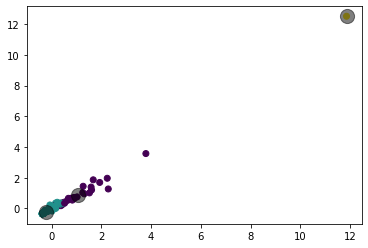

In [17]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='viridis') 

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [18]:
kmeans = KMeans(n_clusters=3).fit(X)
lables=kmeans.predict(X)

In [19]:
ikea = train_df.iloc[:,2:12]

In [20]:
ikea['cluster']=lables

In [21]:
ikea['has_ikea']=pd.Series(lables)
ikea.head(10)

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
0,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,0,0
1,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,2,2
2,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,2,2
3,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0,0
4,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,0,0
5,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0,0,0
6,Värmdö,920,454,38301,4720,0.123234,101.55604,94.795652,0,0,0,0
7,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,2,2
8,Ekerö,144,116,25410,3893,0.153207,62.21259,14.837580,0,0,0,0
9,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,2,2


In [22]:
# Elbow method
wcss = []

for i in range(1,30):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
kmeans.inertia_

49.65276966255818

In [24]:
wcss

[1863.0,
 1074.1803532848032,
 814.56691381711,
 601.7770774871863,
 440.1058553944916,
 370.1658312876187,
 310.33226967963793,
 267.8211569849828,
 230.9675332652711,
 195.70301874774427,
 169.50518281432755,
 149.84283864123947,
 136.8743776788539,
 121.9146003749077,
 115.31014235850793,
 105.4960606856846,
 95.43946859503276,
 88.73466150838182,
 84.28284946543175,
 80.13844425922927,
 74.34477174424835,
 72.43446205794422,
 68.18771975738906,
 65.6827575328794,
 61.954405160269495,
 59.4342366031446,
 55.368582290889805,
 51.883415990892814,
 49.65276966255818]

Text(0, 0.5, 'sum of squares - within cluster')

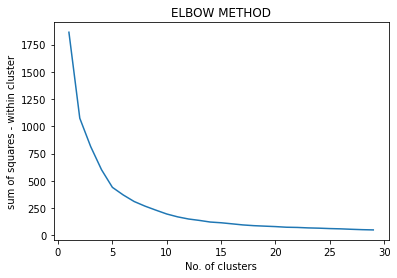

In [25]:
number_clusters = range(1,30)
plt.plot(number_clusters,wcss)
plt.title("ELBOW METHOD")
plt.xlabel("No. of clusters")
plt.ylabel("sum of squares - within cluster")

In [26]:
cluster1=ikea[ikea.has_ikea==0]
cluster2=ikea[ikea.has_ikea==1]
cluster3=ikea[ikea.has_ikea==2]

In [27]:
ikea['has_ikea'] = 0
ikea['has_ikea'] = ikea['Kommun_name'].map({'Borlänge':1,'Gävle':1,'Göteborg':1,'Haparanda':1,'Helsingborg':1,'Jönköping':1,'Kalmar':1,'Karlstad':1,
    'Linköping':1,'Malmö':1,'Stockholm':1,'Sundsvall':1,'Uddevalla':1,'Umeå':1,'Uppsala':1,'Västerås':1,'Älmhult':1,
    'Mölndal':1,'Örebro':1})
ikea['has_ikea'] = ikea['has_ikea'].fillna('0').astype(int)

In [28]:
# CLUSTER 1 ANALYSES

In [29]:
print(cluster1)

        Kommun_name  Revenue  Employee  Population  Population_University  \
0         Haparanda     1078       276       10059                    719   
3    Upplands Väsby     1366       708       39289                   4419   
4        Vallentuna      171        99       30114                   3843   
5         Österåker      563       314       39521                   5011   
6            Värmdö      920       454       38301                   4720   
..              ...      ...       ...         ...                    ...   
201       Degerfors       56        27        9641                    483   
202       Hällefors       52        33        7220                    368   
203    Ljusnarsberg       51        24        4931                    266   
205           Kumla      152        98       20456                   1598   
206       Askersund      126        65       11278                    809   

     Percent_University  Productivity  SalesIndex  Infrast  Border  cluster

In [30]:
cluster1.shape

(177, 12)

In [31]:
cluster1["Revenue"].value_counts()

182    4
112    3
135    3
52     2
68     2
      ..
902    1
669    1
63     1
581    1
152    1
Name: Revenue, Length: 156, dtype: int64

In [32]:
cluster1["SalesIndex"].max()

237.916478

In [33]:
cluster1.loc[cluster1["SalesIndex"]==237.916478]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
168,Uddevalla,2309,1010,51868,5727,0.110415,114.57143,237.916478,0,0,0,0


In [34]:
cluster1["Population"].max()

82608

In [35]:
cluster1.loc[cluster1["Population"]==82608]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
10,Botkyrka,1469,530,82608,8023,0.097121,138.90558,151.363926,0,0,0,0


In [36]:
# CLUSTER 2 ANALYSES

In [37]:
print(cluster2)
cluster2["Revenue"].value_counts()

   Kommun_name  Revenue  Employee  Population  Population_University  \
19   Stockholm    32897     18795      847073                 191585   

    Percent_University  Productivity   SalesIndex  Infrast  Border  cluster  \
19            0.226173       87.7178  3389.665819        1       0        1   

    has_ikea  
19         1  


32897    1
Name: Revenue, dtype: int64

In [38]:
cluster2["Population"].max()

847073

In [39]:
cluster2.loc[cluster2["Population"]==847073]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
19,Stockholm,32897,18795,847073,191585,0.226173,87.7178,3389.665819,1,0,1,1


In [40]:
cluster2["SalesIndex"].max()

3389.665819

In [41]:
cluster2.loc[cluster2["SalesIndex"]==3389.665819]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
19,Stockholm,32897,18795,847073,191585,0.226173,87.7178,3389.665819,1,0,1,1


In [42]:
# CLUSTER 3 ANALYSES

In [43]:
print(cluster3)
cluster3["Population"].max()

      Kommun_name  Revenue  Employee  Population  Population_University  \
1          Kalmar     3790      1621       62815                   8716   
2        Karlstad     4560      1910       85753                  13308   
7        Järfälla     5119      2001       66211                   9009   
9        Huddinge     7153      2374       97453                  12795   
16           Täby     3441      1546       63789                  13442   
17       Danderyd      500       272       31330                   8448   
18     Sollentuna     2393      1116       64630                  12322   
20     Södertälje     2191       894       86246                   8734   
21          Nacka     3104      1489       90108                  17871   
23          Solna     1491       847       68144                  16038   
24        Lidingö      533       259       44017                  10030   
33        Uppsala     7042      3391      197787                  40476   
42     Eskilstuna     284

298963

In [44]:
cluster3.loc[cluster3["Population"]==298963]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
117,Malmö,11217,5740,298963,50084,0.167526,97.93515,1155.785679,1,0,2,2


In [45]:
cluster3.loc[(cluster3["Revenue"] == 0)  ,"SalesIndex"].max()

nan

In [46]:
cluster3.loc[cluster3["SalesIndex"]==346.7254]

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
173,Borås,3365,1486,103294,10919,0.105708,113.48541,346.7254,0,0,2,2
